Se implemento el código visto en clase, realizando algunas modificaciones para lograr que solo se encendieran el led del master y uno de esclavo.

In [ ]:
from mpi4py import MPI

import RPi.GPIO as GPIO

import time as time

# Set up GPIO

GPIO.cleanup()

GPIO.setmode(GPIO.BCM)

GPIO.setup(27, GPIO.OUT) #Mestro Proceso 0, led verde

GPIO.setup(18, GPIO.OUT) #Proceso 1, led rojo

# MPI variables for communication, rank, size, and name of the node

comm = MPI.COMM_WORLD

rank = comm.Get_rank()

size = comm.Get_size()

name = MPI.Get_processor_name()



total_requests = 12

print "rank=",rank

# This is the master node.

if rank == 0:

    request = 0

    process = 1



      # Send the first batch of processes to the nodes.

    while process < size and request < total_requests:

        comm.send(request, dest=process, tag=1)

        print "Sending request",request,"to process",process

        request += 1

        process += 1



    # Wait for the data to come back

    received_processes = 0

    while received_processes < total_requests:

        process = comm.recv(source=MPI.ANY_SOURCE, tag=1)

        print "Received data from process", process

        if (process == 1):

            GPIO.output(18,True)

            time.sleep(1)

            GPIO.output(18,False)


        if request < total_requests:

            comm.send(request, dest=process, tag=1)

            print "Sending request",request,"to process", process

            GPIO.output(27, True)

            request += 1

# Send the shutdown signal

    for process in range(1,size):

        comm.send(-1, dest=process, tag=1)

    print "End"





# These are the slave nodes, where rank > 0. They receive the request from the master node and simply send a response back

else:

    while True:

        start = comm.recv(source=0, tag=1)

        if start == -1: break

        comm.send(rank, dest=0, tag=1)





#Clean up GPIO activities after all processing takes place

GPIO.cleanup()


# Implementación de practica 21/06/2017

Primero se realiza una conexion ssh con la RaspBerry con la herramienta Putty.
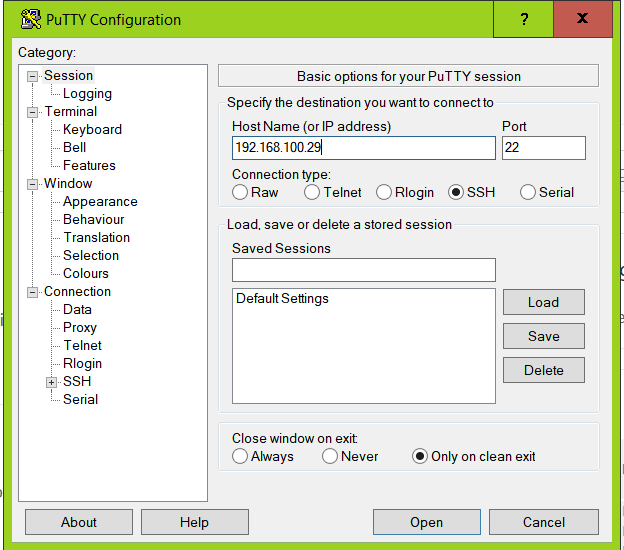

Se ingresa al dirección de comades/python, donde se creo el script de python, en este caso lo llamamos  ledEquipo3 (se crea el archivo con la función nano, y si se quiere editar un archivo seria con la misma funcion colocando posteriormente el nombre del archivo y extensión).
Una vez que se realiza el archivo .py este se debe de copiar a la raspberry la cual funcionara como esclavo, la dirección a donde se va a copiar el archivo debe de ser la misma comades/python.

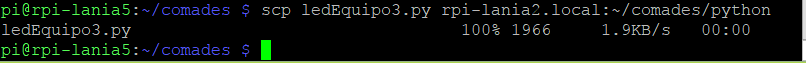

Se debe de modificar el archivo machinefile, colocando unicamente la raspberry que será la esclava, en este caso la rpi-lania2.

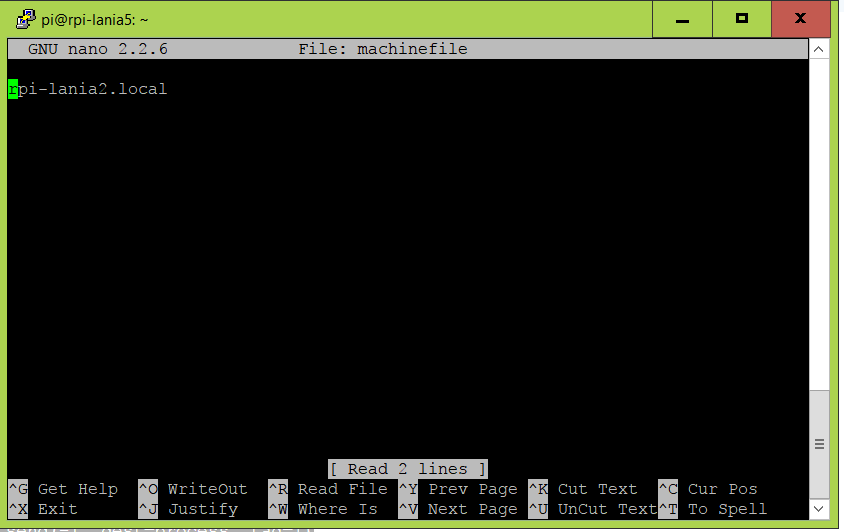

Posteriormente se ejecuta el comando mpirun, haciendo enfasís a dos procesos:

pi@rpi-lania5:~ $ mpirun.openmpi -np 2 -host rpi-lania5.local,rpi-lania2.local python ledEquipo3.py